In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
exchange_path = sorted(glob.glob('./../data/exchange/*'))
exchange = pd.read_csv(exchange_path[5])
exchange_CAD = exchange.iloc[22:]
exchange_CAD = exchange_CAD.reset_index().drop('index', axis = 1)
exchange_CAD = exchange_CAD.drop('Unnamed: 0', axis = 1)
exchange_CAD

,date,buy,standard
0,2022-03-31,986.89,970.15
1,2022-03-30,988.16,976.56
2,2022-03-29,993.60,979.11
3,2022-03-28,1000.83,975.93
4,2022-03-25,990.37,973.30
...,...,...,...
4595,2003-09-30,869.25,850.17
4596,2003-09-29,862.23,850.62
4597,2003-09-26,867.33,853.30
4598,2003-09-25,870.15,853.83


In [3]:
a = exchange_CAD['buy'].iloc[1:].to_numpy()
b = exchange_CAD['buy'].iloc[:len(exchange_CAD)-1].to_numpy()
ex = (b-a)/a*100
exchange_CAD = exchange_CAD.drop(4599)
exchange_CAD['ex'] = ex # % 데이터
exchange_CAD['ex'].isnull().sum()
exchange_CAD

,date,buy,standard,ex
0,2022-03-31,986.89,970.15,-0.128522
1,2022-03-30,988.16,976.56,-0.547504
2,2022-03-29,993.60,979.11,-0.722400
3,2022-03-28,1000.83,975.93,1.056171
4,2022-03-25,990.37,973.30,-0.249786
...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359
4595,2003-09-30,869.25,850.17,0.814168
4596,2003-09-29,862.23,850.62,-0.588011
4597,2003-09-26,867.33,853.30,-0.324082


In [4]:
import datetime
exchange_CAD['dt'] = pd.to_datetime(exchange_CAD['date'])
exchange_CAD['dt'] = exchange_CAD['dt'].dt.strftime('%Y-%m')
exchange_CAD

,date,buy,standard,ex,dt
0,2022-03-31,986.89,970.15,-0.128522,2022-03
1,2022-03-30,988.16,976.56,-0.547504,2022-03
2,2022-03-29,993.60,979.11,-0.722400,2022-03
3,2022-03-28,1000.83,975.93,1.056171,2022-03
4,2022-03-25,990.37,973.30,-0.249786,2022-03
...,...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359,2003-10
4595,2003-09-30,869.25,850.17,0.814168,2003-09
4596,2003-09-29,862.23,850.62,-0.588011,2003-09
4597,2003-09-26,867.33,853.30,-0.324082,2003-09


In [5]:
interest_path = sorted(glob.glob('./../data/interest/*'))
interest_path[-2]

'./../data/interest/40_south-korea_government_bond_rate_1year.csv'

In [6]:
interest_path = sorted(glob.glob('./../data/interest/*'))
interest_Canada = pd.read_csv(interest_path[3])
interest_Korea = pd.read_csv(interest_path[-2])
interest_CAD = interest_Canada.iloc[26:]
interest_KOR = interest_Korea.iloc[49:-658]
interest_CAD, interest_KOR

(      Unnamed: 0        date  interest  change
 26            26  2022-03-31      1.96   -1.01
 27            27  2022-03-30      1.98    6.45
 28            28  2022-03-29      1.86    0.54
 29            29  2022-03-28      1.85    1.09
 30            30  2022-03-25      1.83    5.78
 ...          ...         ...       ...     ...
 5072        4995  2003-09-30      2.59   -2.26
 5073        4996  2003-09-29      2.65    1.15
 5074        4997  2003-09-26      2.62   -0.38
 5075        4998  2003-09-25      2.63    0.38
 5076        4999  2003-09-24      2.62   -0.38
 
 [5051 rows x 4 columns],
       Unnamed: 0        date  interest  change
 49            49  2022-03-31     1.675    1.39
 50            50  2022-03-30     1.652   -0.12
 51            51  2022-03-29     1.654   -0.36
 52            52  2022-03-28     1.660    6.14
 53            53  2022-03-27     1.564    0.00
 ...          ...         ...       ...     ...
 4780        4337  2003-12-12     4.640   -0.43
 4781       

In [7]:
start_date = pd.to_datetime(exchange_CAD.iloc[-1,0]) ## 시작 날짜
end_date = pd.to_datetime(exchange_CAD.iloc[0,0]) ## 마지막 날짜
 
dates = pd.date_range(start_date,end_date,freq='D')
padding = pd.DataFrame({'date' : dates})
padding = padding.sort_values(by = 'date', ascending = False).reset_index().drop('index', axis = 1)
padding['date'] = padding['date'].dt.strftime('%Y-%m-%d')
padding

,date
0,2022-03-31
1,2022-03-30
2,2022-03-29
3,2022-03-28
4,2022-03-27
...,...
6758,2003-09-29
6759,2003-09-28
6760,2003-09-27
6761,2003-09-26


In [8]:
interest_CAD_r = interest_CAD[['date', 'interest']]
interest_CAD_r = interest_CAD_r.rename(columns = {'interest' : 'int_CAD'})

interest_KOR_r = interest_KOR[['date', 'interest']]
interest_KOR_r = interest_KOR_r.rename(columns = {'interest' : 'int_KOR'})

In [9]:
padding_temp = pd.merge(padding,interest_CAD_r, on = 'date', how = 'outer')
padding_temp

,date,int_CAD
0,2022-03-31,1.96
1,2022-03-30,1.98
2,2022-03-29,1.86
3,2022-03-28,1.85
4,2022-03-27,NaN
...,...,...
6759,2003-09-28,NaN
6760,2003-09-27,NaN
6761,2003-09-26,2.62
6762,2003-09-25,2.63


In [10]:
padding_merge = pd.merge(padding_temp,interest_KOR_r, on = 'date', how = 'outer')
padding_merge

,date,int_CAD,int_KOR
0,2022-03-31,1.96,1.675
1,2022-03-30,1.98,1.652
2,2022-03-29,1.86,1.654
3,2022-03-28,1.85,1.660
4,2022-03-27,NaN,1.564
...,...,...,...
6760,2003-09-27,NaN,NaN
6761,2003-09-26,2.62,NaN
6762,2003-09-25,2.63,NaN
6763,2003-09-24,2.62,NaN


In [11]:
padding_null = padding_merge.notnull()
padding_null

,date,int_CAD,int_KOR
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,False,True
...,...,...,...
6760,True,False,False
6761,True,True,False
6762,True,True,False
6763,True,True,False


In [12]:
# for i in range(len(padding_merge)-2,-1,-1):
if not padding_null['int_KOR'][6763]:
    print('널값이다!')

널값이다!


In [13]:
for i in range(len(padding_merge)-2,-1,-1): # 6763부터 시작
    if not padding_null['int_CAD'][i]:
        padding_merge['int_CAD'][i] = padding_merge['int_CAD'][i+1]
    if not padding_null['int_KOR'][i]:
        padding_merge['int_KOR'][i] = padding_merge['int_KOR'][i+1]
padding_merge

/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_10118/3194149557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padding_merge['int_KOR'][i] = padding_merge['int_KOR'][i+1]
/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_10118/3194149557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padding_merge['int_CAD'][i] = padding_merge['int_CAD'][i+1]


,date,int_CAD,int_KOR
0,2022-03-31,1.96,1.675
1,2022-03-30,1.98,1.652
2,2022-03-29,1.86,1.654
3,2022-03-28,1.85,1.660
4,2022-03-27,1.83,1.564
...,...,...,...
6760,2003-09-27,2.62,4.140
6761,2003-09-26,2.62,4.140
6762,2003-09-25,2.63,4.140
6763,2003-09-24,2.62,4.140


In [14]:
exchange_CAD

,date,buy,standard,ex,dt
0,2022-03-31,986.89,970.15,-0.128522,2022-03
1,2022-03-30,988.16,976.56,-0.547504,2022-03
2,2022-03-29,993.60,979.11,-0.722400,2022-03
3,2022-03-28,1000.83,975.93,1.056171,2022-03
4,2022-03-25,990.37,973.30,-0.249786,2022-03
...,...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359,2003-10
4595,2003-09-30,869.25,850.17,0.814168,2003-09
4596,2003-09-29,862.23,850.62,-0.588011,2003-09
4597,2003-09-26,867.33,853.30,-0.324082,2003-09


In [18]:
inflation_Canada = pd.read_excel('./../data/2차/inflation/inflation.xlsx')
data = inflation_Canada.iloc[3, 646:]
index = inflation_Canada.iloc[1, 646:]
index = inflation_Canada.iloc[1, 646:]

In [21]:
inflation_Korea = pd.read_excel('./../data/1차/imf 한미일 물가 지수.xlsx')
inf_KOR = inflation_Korea.iloc[5, 56:].values
b = inf_KOR[1:]
a = inf_KOR[ :len(inf_KOR)-1]
inf_KOR = (b-a)/a*100

In [22]:
liquidity_KOR = pd.read_excel('./../data/2차/Liquidity/korea_Liquidity.xlsx')
liquidity_KOR = liquidity_KOR.iloc[[6,7], 12:len(liquidity_KOR.columns) - 1]
liquidity_KOR

,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,...,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235
6,2003M08,2003M09,2003M10,2003M11,2003M12,2004M01,2004M02,2004M03,2004M04,2004M05,...,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03
7,136123.702941,141472.189772,143245.490267,150272.828765,155284.241118,157374.510531,162935.078208,163487.807592,163568.78933,166471.298235,...,448131.287768,452713.795151,457985.994959,457948.887899,463271.289451,457996.289518,457169.379937,455583.882483,455833.577101,451865.372152


In [23]:
b = liquidity_KOR.iloc[1,1:].to_numpy()
a = liquidity_KOR.iloc[1, :len(liquidity_KOR.columns)-1].to_numpy()
li_KOR = (b-a)/a*100

In [24]:
liquidity_CAD = pd.read_excel('./../data/2차/Liquidity/canada_Liquidity.xlsx')
liquidity_CAD = liquidity_CAD.iloc[[6,7], 48:]

In [27]:
date = liquidity_CAD.iloc[0, 1:]
b = liquidity_CAD.iloc[1,1:].to_numpy()
a = liquidity_CAD.iloc[1, :len(liquidity_CAD.columns)-1].to_numpy()
li = (b-a)/a*100
li_df = pd.DataFrame({'date' : date, 'li_CAD': li, 'li_KOR':li_KOR})
li_df

,date,li_CAD,li_KOR
Unnamed: 49,2003M09,3.934947,3.929137
Unnamed: 50,2003M10,-2.245601,1.253462
Unnamed: 51,2003M11,0.741821,4.905801
Unnamed: 52,2003M12,0.466025,3.334876
Unnamed: 53,2004M01,0.279704,1.346092
...,...,...,...
Unnamed: 267,2021M11,-0.521034,-1.138642
Unnamed: 268,2021M12,2.883968,-0.180549
Unnamed: 269,2022M01,-2.075569,-0.346807
Unnamed: 270,2022M02,-1.449235,0.054808


In [34]:
exchange_CAD

,date,buy,standard,ex,dt,inf_CAD,inf_KOR,m1_CAD,m1_KOR
0,2022-03-31,986.89,970.15,-0.128522,2022-03,1.430518,0.721747,nan,nan
1,2022-03-30,988.16,976.56,-0.547504,2022-03,1.430518,0.721747,nan,nan
2,2022-03-29,993.60,979.11,-0.722400,2022-03,1.430518,0.721747,nan,nan
3,2022-03-28,1000.83,975.93,1.056171,2022-03,1.430518,0.721747,nan,nan
4,2022-03-25,990.37,973.30,-0.249786,2022-03,1.430518,0.721747,nan,nan
...,...,...,...,...,...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359,2003-10,-0.29098,0.087972,nan,nan
4595,2003-09-30,869.25,850.17,0.814168,2003-09,0.194363,0.904861,nan,nan
4596,2003-09-29,862.23,850.62,-0.588011,2003-09,0.194363,0.904861,nan,nan
4597,2003-09-26,867.33,853.30,-0.324082,2003-09,0.194363,0.904861,nan,nan


In [31]:
monthly = pd.DataFrame({'index' : index, 'inf_CAD': data, 'inf_KOR' : inf_KOR})
monthly['dt'] = monthly['index'].str[:4] + '-' + monthly['index'].str[5:]
monthly['dt'] = pd.to_datetime(monthly['dt'])
monthly['dt'] = monthly['dt'].dt.strftime('%Y-%m')
monthly['li_CAD'] = li_df['li_CAD'].values
monthly['li_KOR'] = li_df['li_KOR'].values
monthly

,index,inf_CAD,inf_KOR,dt,li_CAD,li_KOR
Unnamed: 646,2003M09,0.194363,0.904861,2003-09,3.934947,3.929137
Unnamed: 647,2003M10,-0.29098,0.087972,2003-10,-2.245601,1.253462
Unnamed: 648,2003M11,0.291829,-0.178625,2003-11,0.741821,4.905801
Unnamed: 649,2003M12,0.096993,0.450201,2003-12,0.466025,3.334876
Unnamed: 650,2004M01,0.096899,0.624912,2004-01,0.279704,1.346092
...,...,...,...,...,...,...
Unnamed: 864,2021M11,0.208478,0.503145,2021-11,-0.521034,-1.138642
Unnamed: 865,2021M12,-0.138696,0.163666,2021-12,2.883968,-0.180549
Unnamed: 866,2022M01,0.902778,0.62476,2022-01,-2.075569,-0.346807
Unnamed: 867,2022M02,1.032347,0.582673,2022-02,-1.449235,0.054808


In [35]:
inflation_CAD_list = monthly['inf_CAD'].to_list()
inflation_KOR_list = monthly['inf_KOR'].to_list()
liquidity_CAD_list = monthly['li_CAD'].to_list()
liquidity_KOR_list = monthly['li_KOR'].to_list()
monthly_index_list = monthly['dt'].to_list()
exchange_CAD['inf_CAD'] = 'nan'
exchange_CAD['inf_KOR'] = 'nan'
exchange_CAD['m1_CAD'] = 'nan'
exchange_CAD['m1_KOR'] = 'nan'
for i in range(len(exchange_CAD)):
    try:
        exchange_CAD['inf_CAD'][i] = inflation_CAD_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
        exchange_CAD['inf_KOR'][i] = inflation_KOR_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
        exchange_CAD['m1_CAD'][i] = liquidity_CAD_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
        exchange_CAD['m1_KOR'][i] = liquidity_KOR_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
    except: print(f'{i}외왆되?')
exchange_CAD

/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_10118/748750158.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_CAD['inf_CAD'][i] = inflation_CAD_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_10118/748750158.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_CAD['inf_KOR'][i] = inflation_KOR_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_10118/748750158.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



,date,buy,standard,ex,dt,inf_CAD,inf_KOR,m1_CAD,m1_KOR
0,2022-03-31,986.89,970.15,-0.128522,2022-03,1.430518,0.721747,0.84991,-0.870538
1,2022-03-30,988.16,976.56,-0.547504,2022-03,1.430518,0.721747,0.84991,-0.870538
2,2022-03-29,993.60,979.11,-0.722400,2022-03,1.430518,0.721747,0.84991,-0.870538
3,2022-03-28,1000.83,975.93,1.056171,2022-03,1.430518,0.721747,0.84991,-0.870538
4,2022-03-25,990.37,973.30,-0.249786,2022-03,1.430518,0.721747,0.84991,-0.870538
...,...,...,...,...,...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359,2003-10,-0.29098,0.087972,-2.245601,1.253462
4595,2003-09-30,869.25,850.17,0.814168,2003-09,0.194363,0.904861,3.934947,3.929137
4596,2003-09-29,862.23,850.62,-0.588011,2003-09,0.194363,0.904861,3.934947,3.929137
4597,2003-09-26,867.33,853.30,-0.324082,2003-09,0.194363,0.904861,3.934947,3.929137


In [36]:
left = exchange_CAD[['date', 'ex', 'inf_CAD', 'inf_KOR', 'm1_CAD', 'm1_KOR']]
right = padding_merge[['date', 'int_CAD', 'int_KOR']]
merge_df = pd.merge(left,right, on = 'date', how = 'left', sort = True)
merge_df

,date,ex,inf_CAD,inf_KOR,m1_CAD,m1_KOR,int_CAD,int_KOR
0,2003-09-25,0.554689,0.194363,0.904861,3.934947,3.929137,2.63,4.140
1,2003-09-26,-0.324082,0.194363,0.904861,3.934947,3.929137,2.62,4.140
2,2003-09-29,-0.588011,0.194363,0.904861,3.934947,3.929137,2.65,4.140
3,2003-09-30,0.814168,0.194363,0.904861,3.934947,3.929137,2.59,4.140
4,2003-10-01,0.163359,-0.29098,0.087972,-2.245601,1.253462,2.57,4.140
...,...,...,...,...,...,...,...,...
4594,2022-03-25,-0.249786,1.430518,0.721747,0.84991,-0.870538,1.83,1.564
4595,2022-03-28,1.056171,1.430518,0.721747,0.84991,-0.870538,1.85,1.660
4596,2022-03-29,-0.722400,1.430518,0.721747,0.84991,-0.870538,1.86,1.654
4597,2022-03-30,-0.547504,1.430518,0.721747,0.84991,-0.870538,1.98,1.652


In [39]:
merge_df.isnull().sum()

date       0
ex         0
inf_CAD    0
inf_KOR    0
m1_CAD     0
m1_KOR     0
int_CAD    0
int_KOR    0
dtype: int64

In [40]:
merge_df = merge_df.set_index('date')
merge_df = merge_df.astype('float')

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

[[0.8778614320114595, 1.73, 1.485, 1.430517711171658, 0.7217473884140599, 0.8499097242411886, -0.8705380973466681], [-0.24978596968323694, 1.83, 1.564, 1.430517711171658, 0.7217473884140599, 0.8499097242411886, -0.8705380973466681], [1.0561709260175527, 1.85, 1.66, 1.430517711171658, 0.7217473884140599, 0.8499097242411886, -0.8705380973466681], [-0.7224004076616426, 1.86, 1.654, 1.430517711171658, 0.7217473884140599, 0.8499097242411886, -0.8705380973466681], [-0.5475040257649009, 1.98, 1.652, 1.430517711171658, 0.7217473884140599, 0.8499097242411886, -0.8705380973466681]] -> [-0.12852169689118986]
Metal device set to: Apple M1


2022-05-20 15:28:17.634954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-20 15:28:17.635066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 5)              260       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 486
Trainable params: 486
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 15:28:18.541424: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-20 15:28:19.253624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:28:19.496352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:28:20.497691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:28:21.441796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:28:22.275489: I tensorflow/c

322/322 [==============================] - 8s 11ms/step - loss: 0.4677
Epoch 2/300
322/322 [==============================] - 4s 11ms/step - loss: 0.4640
Epoch 3/300
322/322 [==============================] - 4s 12ms/step - loss: 0.4627
Epoch 4/300
322/322 [==============================] - 4s 11ms/step - loss: 0.4621
Epoch 5/300
322/322 [==============================] - 4s 12ms/step - loss: 0.4609
Epoch 6/300
322/322 [==============================] - 3s 11ms/step - loss: 0.4599
Epoch 7/300
322/322 [==============================] - 4s 11ms/step - loss: 0.4590
Epoch 8/300
322/322 [==============================] - 4s 11ms/step - loss: 0.4575
Epoch 9/300
322/322 [==============================] - 4s 12ms/step - loss: 0.4553
Epoch 10/300
322/322 [==============================] - 4s 12ms/step - loss: 0.4548
Epoch 11/300
322/322 [==============================] - 4s 12ms/step - loss: 0.4529
Epoch 12/300
322/322 [==============================] - 4s 11ms/step - loss: 0.4498
Epoch 13/300


322/322 [==============================] - 4s 13ms/step - loss: 0.3937
Epoch 99/300
322/322 [==============================] - 4s 12ms/step - loss: 0.3938
Epoch 100/300
322/322 [==============================] - 4s 12ms/step - loss: 0.3936
Epoch 101/300
322/322 [==============================] - 4s 12ms/step - loss: 0.3908
Epoch 102/300
322/322 [==============================] - 4s 12ms/step - loss: 0.3912
Epoch 103/300
322/322 [==============================] - 4s 12ms/step - loss: 0.3926
Epoch 104/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3904
Epoch 105/300
322/322 [==============================] - 5s 14ms/step - loss: 0.3914
Epoch 106/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3881
Epoch 107/300
322/322 [==============================] - 4s 12ms/step - loss: 0.3869
Epoch 108/300
322/322 [==============================] - 4s 12ms/step - loss: 0.3871
Epoch 109/300
322/322 [==============================] - 4s 13ms/step - loss: 0.

322/322 [==============================] - 4s 13ms/step - loss: 0.3464
Epoch 195/300
322/322 [==============================] - 4s 14ms/step - loss: 0.3473
Epoch 196/300
322/322 [==============================] - 4s 14ms/step - loss: 0.3442
Epoch 197/300
322/322 [==============================] - 6s 19ms/step - loss: 0.3453
Epoch 198/300
322/322 [==============================] - 5s 15ms/step - loss: 0.3437
Epoch 199/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3439
Epoch 200/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3438
Epoch 201/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3426
Epoch 202/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3417
Epoch 203/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3478
Epoch 204/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3393
Epoch 205/300
322/322 [==============================] - 4s 13ms/step - loss: 0

322/322 [==============================] - 4s 13ms/step - loss: 0.3168
Epoch 291/300
322/322 [==============================] - 4s 12ms/step - loss: 0.3150
Epoch 292/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3150
Epoch 293/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3134
Epoch 294/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3125
Epoch 295/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3159
Epoch 296/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3125
Epoch 297/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3144
Epoch 298/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3120
Epoch 299/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3109
Epoch 300/300
322/322 [==============================] - 4s 13ms/step - loss: 0.3132


2022-05-20 15:49:17.863570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:49:17.986883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:49:18.133945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


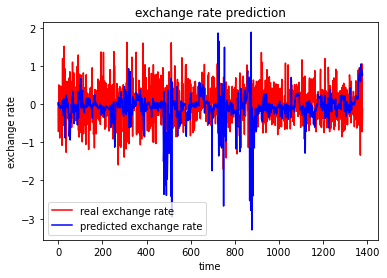

NameError: name 'merge_left' is not defined

In [42]:
# 외국/한국 환율 , 한국과 외국의 단기 이자율 차이, 한국과 외국의 물가 상승률 차이, 한국과 외국의 통화량 상승률 차이, 한국과 외국의 GDP 차이

dfx = merge_df[['ex', 'int_CAD', 'int_KOR', 'inf_CAD', 'inf_KOR', 'm1_CAD', 'm1_KOR']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 7

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

In [ ]:
dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 600
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=600, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.24978596968323694, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [1.0561709260175527, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.7224004076616426, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.5475040257649009, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981]] -> [-0.12852169689118986]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_7 (LSTM)               (None, 5)                 220       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                            

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 15:13:49.110116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:49.303701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:49.346231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:49.405727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:49.474192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 5s 11ms/step - loss: 0.4706
Epoch 2/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4645
Epoch 3/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4639
Epoch 4/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4634
Epoch 5/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4631
Epoch 6/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4632
Epoch 7/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4630
Epoch 8/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4627
Epoch 9/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4622
Epoch 10/600
322/322 [==============================] - 3s 11ms/step - loss: 0.4624
Epoch 11/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4615
Epoch 12/600
322/322 [==============================] - 3s 11ms/step - loss: 0.4612
Epoch 13/600


In [ ]:
## 기본 'adam'
dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

In [ ]:
# lr = 0.0001

dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

In [ ]:
# 활성화 함수 relu
dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='relu'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')